# VG SALES

#### Dataset: https://www.kaggle.com/kedokedokedo/vgsales

#### Name: Kinjal Bhatt


**_Datset Details: This dataset contains 11 columns and 16598 rows. This dataset is about the sales of different platforms and Genre for the games. The sales are for different region as well as global sales._**
    
**_Problem Statement: Here, I want to predict the sales of the games in North America, as well as which platform and genre has the highest sell. So that profit or loss in the sales for North America can be predictable._**


## Import the libraries

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline


import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization

In [2]:
# Load the Dataset
data = pd.read_csv('vgsales.csv')

In [3]:
data.shape

(16598, 11)

In [4]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## Data Cleaning

In [8]:
data.dropna(inplace=True)

**Here, I just simply drop the NULL values.**

In [9]:
data.shape

(16291, 11)

In [10]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Exploratory Data Analysis

In [11]:
print('Total number of unique value in column "Name" is: ', data['Name'].nunique())

Total number of unique value in column "Name" is:  11325


In [12]:
data['Name'].value_counts()

Need for Speed: Most Wanted    12
FIFA 14                         9
Ratatouille                     9
LEGO Marvel Super Heroes        9
Cars                            8
                               ..
PGA Tour 96                     1
Game & Wario                    1
Angry Birds                     1
Shadow Hearts: Covenant         1
Know How 2                      1
Name: Name, Length: 11325, dtype: int64

In [13]:
print('Total number of unique value in column "Publisher" is: ', data['Publisher'].nunique())

Total number of unique value in column "Publisher" is:  576


In [14]:
data['Publisher'].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

In [15]:
print('Total number of unique value in column "Platform" is: ', data['Platform'].nunique())

Total number of unique value in column "Platform" is:  31


In [16]:
data['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [17]:
data['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [18]:
print('Total number of unique value in column "Genre" is: ', data['Genre'].nunique())

Total number of unique value in column "Genre" is:  12


<AxesSubplot:xlabel='Platform'>

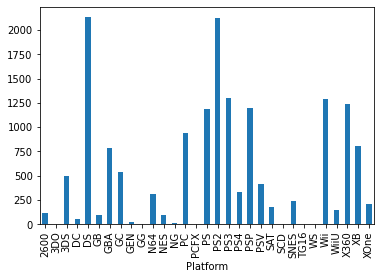

In [19]:
# Platform Distributions

data.groupby("Platform").size().plot(kind="bar")

**Above bar graph shows platform counts where, "DS" and "PS2" is the highest choosen game platforms among all.**

<AxesSubplot:ylabel='None'>

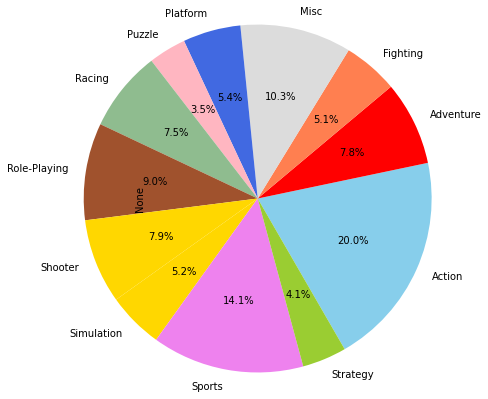

In [20]:
#Genre Distibution


colors = ['skyblue', 'red', 'coral', 'gainsboro', 'royalblue', 'lightpink', 'darkseagreen', 'sienna', 'gold', 'gold', 'violet', 'yellowgreen']
data.groupby('Genre').size().plot.pie(autopct="%1.1f%%", colors=colors, radius=2, startangle=300)

**Above pie chart shows "Action" and "Sports" are highest published game category among all the genre.**


<AxesSubplot:ylabel='None'>

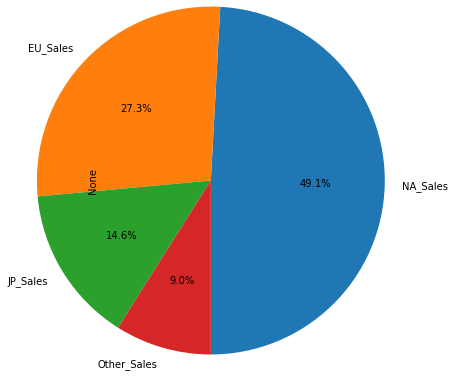

In [21]:
# Sales of video games across all region

data[["NA_Sales", "EU_Sales","JP_Sales","Other_Sales"]].sum().plot(kind='pie', autopct="%1.1f%%", startangle=270, radius=2)

**The above pie chart clearly shows that almost 50% of the total sales in video games is contributed by North American region which includes contries like Canada.**

<AxesSubplot:xlabel='Genre'>

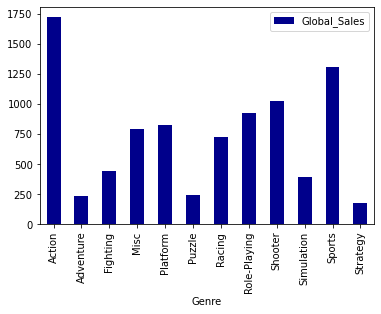

In [22]:
# Global sales for genre

data.groupby('Genre')['Global_Sales'].sum().plot(kind='bar', legend='Global Sales', color = "darkBlue")

**Above bar chart shows total Sales for each genre. Where, 'Action' has the highest sales and 'statretegy' is the least chosen.**

<AxesSubplot:xlabel='Year'>

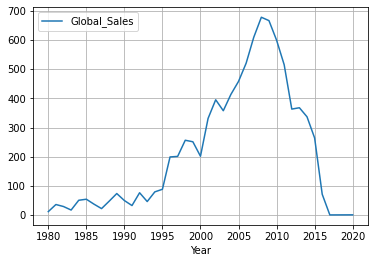

In [23]:
# Global Sales according to years

data.groupby("Year")["Global_Sales"].sum().plot(kind="line", grid=True, legend=True)

**The above line graph shows the Global_sales ratio respected to the years, where maximum sales were in between the year 2005-2010 with a peak in the year 2008.**

<AxesSubplot:xlabel='Year'>

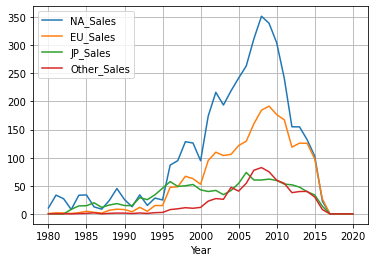

In [24]:
# Sales trends in different region

data.groupby("Year")["NA_Sales"].sum().plot(kind="line", grid=True, legend=True)
data.groupby("Year")["EU_Sales"].sum().plot(kind="line", grid=True, legend=True)
data.groupby("Year")["JP_Sales"].sum().plot(kind="line", grid=True, legend=True)
data.groupby("Year")["Other_Sales"].sum().plot(kind="line", grid=True, legend=True)

**The overall sales for each region are peaked from 2005-2010 as shown from the above graph.**

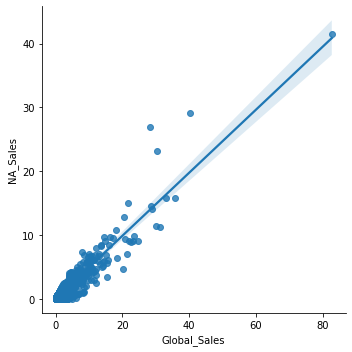

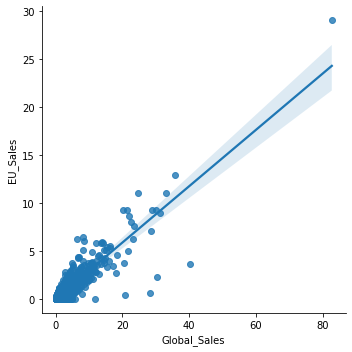

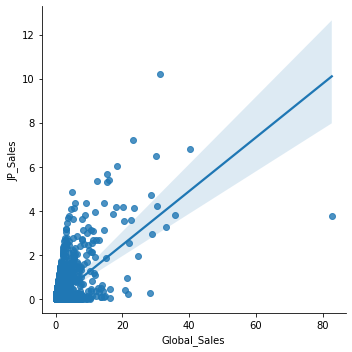

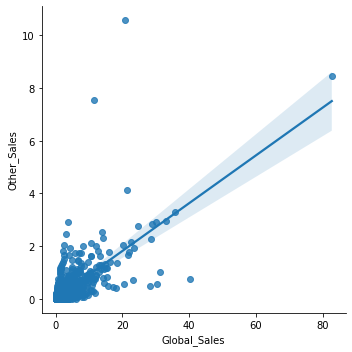

In [81]:
# variability of regional sales with global sales

sns.lmplot(x="Global_Sales", y="NA_Sales", data=data, fit_reg=True)
sns.lmplot(x="Global_Sales", y="EU_Sales", data=data, fit_reg=True)
sns.lmplot(x="Global_Sales", y="JP_Sales", data=data, fit_reg=True)
sns.lmplot(x="Global_Sales", y="Other_Sales", data=data, fit_reg=True)

**Above plotter graph shows positive relation. It shows when global_sales increases the 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales' are also increased.**

In [26]:
#Drop unnecessary columns
data = data.drop(['Rank','Name','Publisher'], axis = 1)

## Model Building

#### Here, I am going to choose a target variable "NA_Sales", which predicts the sales of North American country's games.

In [27]:
#categorical data
categorical_cols = ['Genre', 'Platform'] 

#Data Encoder
clean_data = pd.get_dummies(data, columns = categorical_cols)

In [28]:
clean_data.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,...,Platform_SAT,Platform_SCD,Platform_SNES,Platform_TG16,Platform_WS,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne
0,2006.0,41.49,29.02,3.77,8.46,82.74,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1985.0,29.08,3.58,6.81,0.77,40.24,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2008.0,15.85,12.88,3.79,3.31,35.82,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2009.0,15.75,11.01,3.28,2.96,33.00,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1996.0,11.27,8.89,10.22,1.00,31.37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# giving the value for x and y for data prediction

x = clean_data.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'], axis = 1)
y = clean_data[['NA_Sales']]

In [30]:
y.head()

,NA_Sales
0,41.49
1,29.08
2,15.85
3,15.75
4,11.27


In [31]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.0020, random_state = 150)

### 1. LinearRegression Model

In [32]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
y_pred = reg.fit(X_train, y_train).predict(X_test)
reg.score(X_test, y_test)

0.21724262109064663

**Here, the model is getting an average accuracy 0.21724262109064663**.

In [33]:
# count for Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)
print("Mean_Sqaured_error is:", y_pred)

Mean_Sqaured_error is: [[ 0.08630371]
 [ 0.06970215]
 [ 0.02050781]
 [ 0.21203613]
 [ 0.3145752 ]
 [ 0.2956543 ]
 [ 0.11633301]
 [ 0.1998291 ]
 [ 0.15881348]
 [ 0.20568848]
 [ 0.31188965]
 [ 0.25427246]
 [ 0.23913574]
 [ 0.24890137]
 [ 0.31188965]
 [ 0.06982422]
 [-0.04553223]
 [ 0.18054199]
 [ 0.11462402]
 [ 0.13464355]
 [ 0.2175293 ]
 [ 0.68566895]
 [ 0.71716309]
 [ 0.45166016]
 [ 0.17529297]
 [ 0.68566895]
 [ 0.24890137]
 [ 0.21472168]
 [ 0.25866699]
 [ 0.07971191]
 [ 0.09484863]
 [ 0.26672363]
 [ 0.10961914]]


**The best Mean_Squared_error I get here is: 0.08630371. Which means it's shown a less error.**

### 2. Gradient Boosting Regressor

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.14, random_state = 10)

reg = GradientBoostingRegressor(random_state=10)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)
mean_squared_error(y_test, y_pred)

1.3219079650575483

**Here, I got 1.3219079650575483 accuracy.**

### 3. Ridge Regression

In [35]:
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from numpy import arange
from sklearn.metrics import accuracy_score 

In [65]:
lambda_values = 10**np.linspace(10,-2,100)*0.5


In [66]:
model = Ridge()
coefficients = []

for i in lambda_values:
    model.set_params(alpha = i)
    model.fit(X_train, y_train)
    coefficients.append(model.coef_)

In [42]:
# define model
model = Ridge()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = RidgeCV(alphas=arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
# fit model
model.fit(x, y)
# summarize chosen configuration
print('alpha: %f' % model.alpha_)



alpha: 0.990000


In [73]:
print('Mean MAE: %.3f (%.3f)' % (mean(y_pred), std(y_pred)))

Mean MAE: 0.266 (0.189)


In [52]:
# from sklearn.model_selection import GridSearchCV
y_pred = model.predict(X_train)

In [53]:
y_pred

array([[0.32687433],
       [0.54927374],
       [0.49100913],
       ...,
       [0.22522808],
       [0.23593341],
       [0.28577288]])

In [57]:
RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
RMSE

0.7397627903158139

In [59]:
y_pred = model.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

1.0033176914807553

### Conclusion

- Here, I have predicted the North America sales for games by using different models. And, I have got different accuracy in all of that model. 

- Accuracy values are listed below for each and every model.

**LinearRegression Model:**
- Regression Scores: 0.21724262109064663 
- MAE: 0.08630371

**Gradient Boosting Regressor:** 
- MeanSquaredError: 1.3219079650575483

**For Ridge Regression:**
- alpha: 0.990000
- Mean MAE: 0.266 (0.189)
- Train RMSE: 0.7397627903158139 
- Test RMSE: 1.0033176914807553 